In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def make_system():
    """Make a system object for the HIV model.
    
    
    
    returns: System object
    """
    gamma=1.36
    tau=0.2
    mu=1.36e-3
    beta=0.00027
    ro=0.1
    alpha=3.6e-2
    delta=0.33
    pi=100
    sigma=2
    t_0 = 0

    t_end = 120
    dT=0.06



    return System(gamm=gamma, tau=tau, mu=mu,
                  beta=beta, ro=ro, alpha=alpha,delta=delta, pi=pi, sigma=sigma,t_0=t_0,t_end=t_end,dT=dT)

In [3]:
def update(state, time, system):
    R, L, E, V = state
    gamma, tau, mu, beta, ro, alpha, delta, pi, sigma, t_0, t_end, dT = system
    
    dRdT = gamma * tau - mu * R - beta * R * V
    dLdT = ro * beta * R * V - mu * L - alpha * L
    dEdT = (1 - ro) * beta * R * V + alpha * L - delta * E
    dVdT = pi * E - sigma * V
    R += dRdT * dT
    L += dLdT * dT
    E += dEdT * dT
    V += dVdT * dT

    return (State(R=R, L=L, E=E, V=V))

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    init = State(R=200, L=0, E=0, V=4e-7)
    gamma, tau, mu, beta, ro, alpha, delta, pi, sigma, t_0, t_end, dT = system
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dT)
    
    for t in ts:
        frame.row[t+dT] = update_func(frame.row[t], t, system)
    
    return frame


In [5]:
sys = make_system()
frame = run_simulation(sys, update)

R             L             E             V
0.00    200.000000  0.000000e+00  0.000000e+00  4.000000e-07
0.06    200.000000  1.296000e-10  1.166400e-09  3.520000e-07
0.12    200.000000  2.433575e-10  2.170017e-09  3.167584e-07
0.18    200.000000  3.454417e-10  3.051244e-09  2.917675e-07
0.24    200.000000  4.392000e-10  3.842370e-09  2.750629e-07
...            ...           ...           ...           ...
119.76   17.993435  6.626104e-01  2.389403e-01  1.201070e+01
119.82   18.004785  6.614752e-01  2.387915e-01  1.200306e+01
119.88   18.016135  6.603425e-01  2.386431e-01  1.199544e+01
119.94   18.027484  6.592124e-01  2.384952e-01  1.198784e+01
120.00   18.038832  6.580848e-01  2.383478e-01  1.198027e+01

[2001 rows x 4 columns]

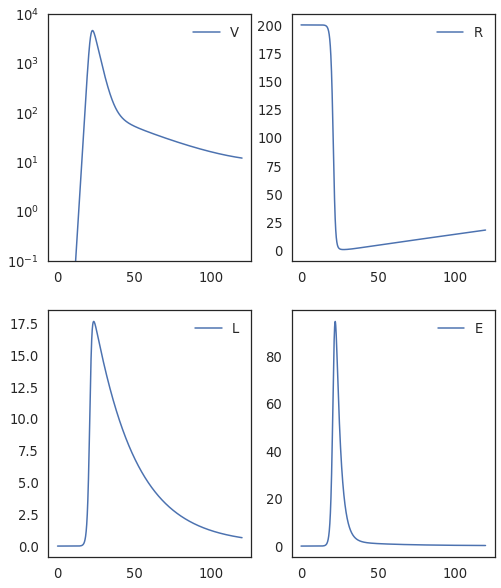

In [15]:
# plot(frame["V"])
# plot(frame["R"])
# plot(frame["L"])
# plot(frame["E"])
fig = plt.figure(figsize=(8, 10))

ax = fig.add_subplot(2, 2, 1)
line = ax.plot(frame["V"],label='V')
ax.set_yscale('log')
ax.set_ylim([0.1,10e3])
legend()
ax = fig.add_subplot(2, 2, 2)
line = ax.plot(frame["R"],label='R')
legend()
ax = fig.add_subplot(2, 2, 3)
line = ax.plot(frame["L"],label='L')
legend()
ax = fig.add_subplot(2, 2, 4)
line = ax.plot(frame["E"],label='E')
title
legend()